# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/callistaswart/Projects/module_5_challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/callistaswart/Projects/module_5_challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#check data to see where to merge
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [97]:
# Checking the number of mice.
n=len(pd.unique(df["Mouse ID"]))
print(n)

249


In [98]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate=df[df.duplicated(["Mouse ID","Timepoint"])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [99]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates=df[df['Mouse ID']=="g989"]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=df.drop(df.loc[df['Mouse ID']=="g989"].index)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice in the clean DataFrame.
n=len(pd.unique(cleaned_df["Mouse ID"]))
print(n)

248


## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen=cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_regimen=cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_regimen=cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_regimen=cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM_regimen=cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df=pd.DataFrame({'Tumor Volume Mean':mean_regimen, 'Tumor Volume Median' :median_regimen,
                         'Tumor Volume Variance':var_regimen, 'Tumor Volume Standard Deviation':std_regimen, 'Tumor Volume SEM':SEM_regimen})
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

#Not totally sure on the aggregation method...

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

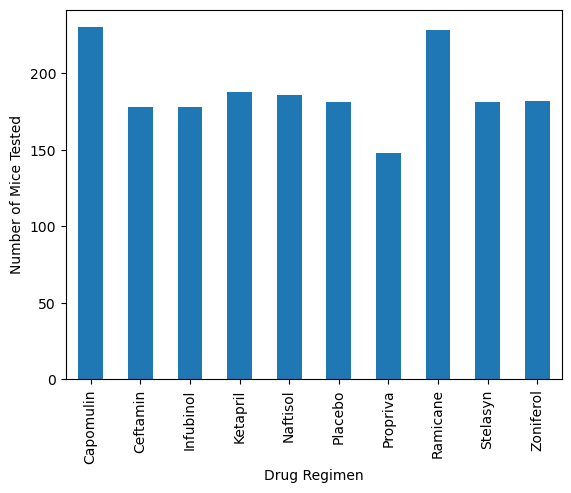

In [104]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create Group based on values in Drug Regimen
drug_tested = cleaned_df.groupby("Drug Regimen")
# Count how many times each drug appears in the group
mouse_count=drug_tested["Drug Regimen"].count()
#test DF to make sure it looks right
#mouse_count
count_chart=mouse_count.plot(kind='bar')

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice Tested")


<function matplotlib.pyplot.show(close=None, block=None)>

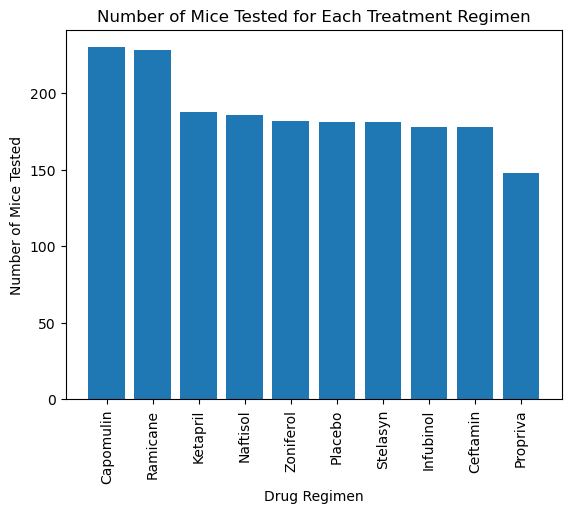

In [105]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = cleaned_df['Drug Regimen'].value_counts()
x_axis=np.arange(len(counts))

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations,counts.index.values)
plt.bar(x_axis,counts)
plt.xticks(rotation="vertical")

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title('Number of Mice Tested for Each Treatment Regimen')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

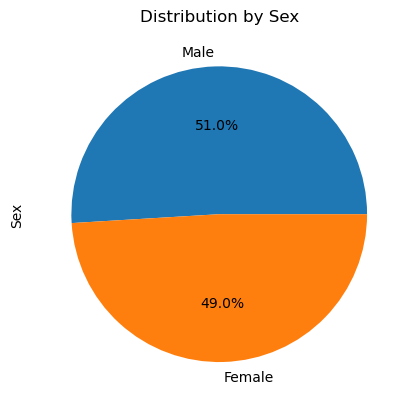

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=cleaned_df["Sex"].value_counts()

sex.plot(kind="pie",autopct="%1.1f%%")
plt.title('Distribution by Sex')
# Labels for the sections of our pie chart
labels = sex.index.values

plt.show


Text(0.5, 1.0, 'Distribution by Sex')

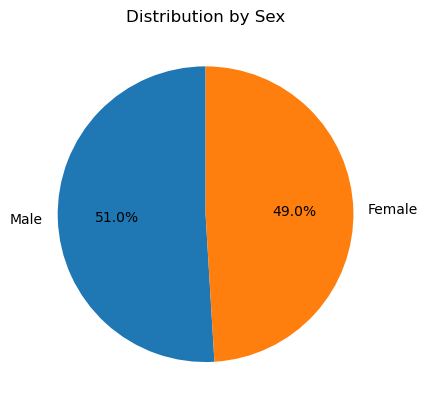

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Labels for the sections of our pie chart
labels = sex.index.values

plt.pie(sex, labels=labels,autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')



## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp=pd.DataFrame(cleaned_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
#max_tp.head()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(cleaned_df, max_tp, on='Mouse ID')
merged_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [117]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values=[]

for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
    final_volume=temp_df.loc[temp_df["Timepoint"]==temp_df["max_timepoint"]]
    

# Create list to fill with tumor vol data (for plotting)
    values = final_volume['Tumor Volume (mm3)']
    drug_values.append(values)  

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')

        # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')

    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'{drug} outliers: {outliers_count}')
    

    
    

IQR for Capomulin: 7.781863460000004
IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Ceftamin outliers: 0


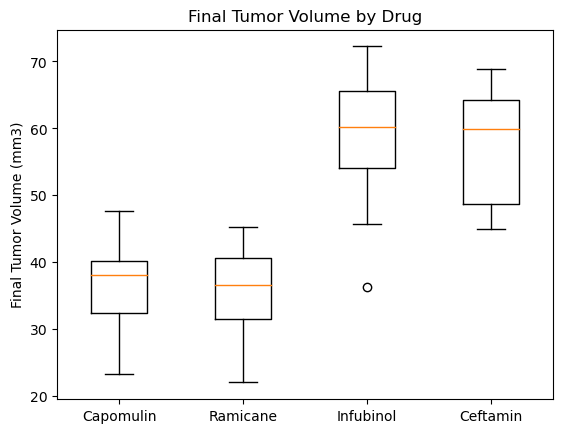

In [121]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Plot boxplot
plt.boxplot(drug_values)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

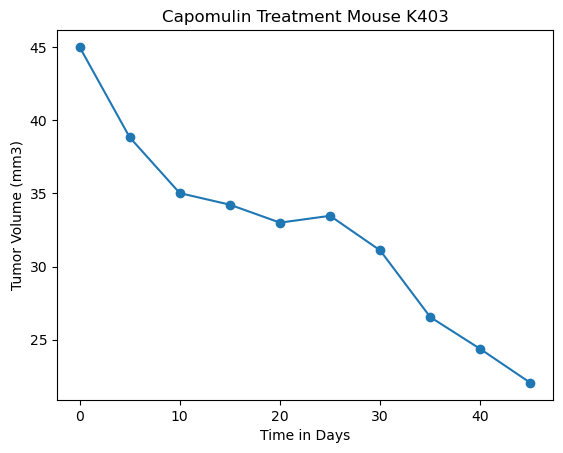

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#id a mouse
mouse=cleaned_df.loc[cleaned_df["Mouse ID"]=="k403"]
#plot line chart
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
#add labels and title
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment Mouse K403")

plt.show


<AxesSubplot:title={'center':'Tumor Volume vs. Weight of Mouse'}, xlabel='Weight (g)', ylabel='avg_tumor_vol'>

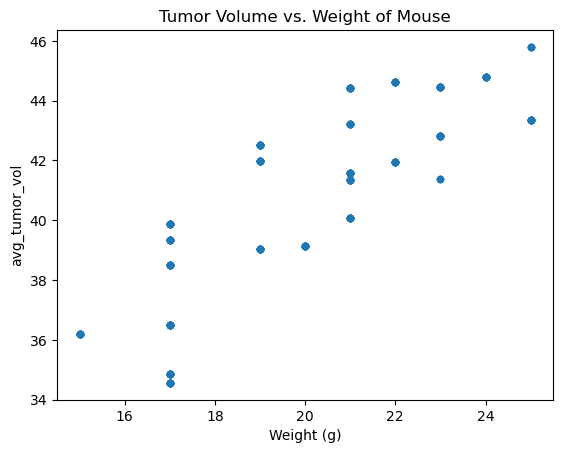

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap=cleaned_df.loc[cleaned_df['Drug Regimen']=="Capomulin"]

avg_volume=pd.DataFrame(cap.groupby("Mouse ID")
                        ["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns=
                        {'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_volume=pd.merge(cap,avg_volume, on="Mouse ID")
final_df=avg_volume[["Weight (g)", "avg_tumor_vol"]]

#testing
final_df.head()

#plot it
final_df.plot(kind="scatter", x="Weight (g)", y="avg_tumor_vol", title="Average Tumor Volume by Weight")




## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x=final_df["Weight (g)"] 
y=final_df["avg_tumor_vol"] 

correlation=st.pearsonr(x,y)
print(correlation)


(slope, intercept, rvalue, pvalue, stderr) = st(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()

PearsonRResult(statistic=0.8343958614425968, pvalue=6.495737656131707e-61)


TypeError: 'module' object is not callable